## Poisson Distribution
A poisson distribution focuses on the number of discrete events or occurrences over a specified interval or continuum (e.g. time,length,distance,etc.). We'll look at the formal definition, get a break down of what that actually means, see an example and then look at the other characteristics such as mean and standard deviation.

Formal Definition: A discrete random variable X has a Poisson distribution with parameter λ if for k=0,1,2.., the probability mass function of X is given by:

$$Pr(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$$

where e is Euler's number (e=2.718...) and k! is the factorial of k.

The Poisson Distribution has the following characteristics:

    1.) Discrete outcomes (x=0,1,2,3...)
    2.) The number of occurrences can range from zero to infinity (theoretically). 
    3.) It describes the distribution of infrequent (rare) events.
    4.) Each event is independent of the other events.
    5.) Describes discrete events over an interval such as a time or distance.
    6.) The expected number of occurrences E(X) are assumed to be constant throughout the experiment.
    
So what would an example question look like? 

Let's say a McDonald's has a lunch rush  from 12:30pm to 1:00pm. From looking at customer sales from previous days, we know that on average 10 customers enter during 12:30pm to 1:00pm. What is the probability that *exactly* 7 customers enter during lunch rush? What is the probability that *more than* 10 customers arrive? 

Let's begin by thinking about how many customers we expect to come into McDonald's during lunch rush. Well we were actually already given that information, it's 10. This means that the mean is 10, then our expected value E(X)=10. In the Poisson distribution this is λ. So the mean = λ for a Poisson Distribution, it is the expected number of occurences over the specfied interval.

So since we now know what λ is, we can plug the information into the probability mass function and get an answer, let's use python and see how this works. Let's start off by answering the first question: 

What is the probability that exactly 7 customers enter during lunch rush?

In [2]:
# Note do not use lambda as an object name in python! It is already used for special lambda functions in Python!!
from __future__ import division
from math import exp
from math import factorial

# Set lambda
lamb = 10

# Set k to the number of occurences
k=7

# Now put the probability mass function
prob = (lamb**k)*exp(-lamb)/factorial(k)

# Put into percentage form and print answer
print(' There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*prob))

 There is a 9.01 % chance that exactly 7 customers show up at the lunch rush


## Now that we've seen how to create the PMF manually, let's see how to do it automatically with scipy.

In [3]:
# Import the dsitrubtion from scipy.stats
from scipy.stats import poisson

# Set our mean = 10 customers for the lunch rush
mu = 10

# Then we can get the mean and variance
mean,var = poisson.stats(mu)

# We can also calculate the PMF at specific points, such as the odds of exactly 7 customers
odds_seven = poisson.pmf(7,mu)

#Print
print('There is a %2.2f %% chance that exactly 7 customers show up at the lunch rush' %(100*odds_seven))

# Print the mean
print('The mean is %2.2f ' %mean)

There is a 9.01 % chance that exactly 7 customers show up at the lunch rush
The mean is 10.00 


Awesome! Our manual results match up with scipy's built in stats distribution generator!

## Now what if we wanted to see the entire distribution? We'll need this information to answer the second question.

<BarContainer object of 30 artists>

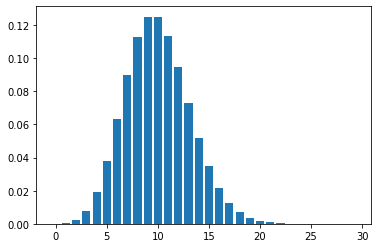

In [5]:
# Now let's get the PMF and plot it

# First the PMF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's see the PMF for all the way to 30 customers, remeber theoretically an infinite number of customers could show up.
k=np.arange(30)

# Average of 10 customers for the time interval
lamb = 10

#The PMF we'll use to plot
pmf_pois = poisson.pmf(k,lamb)

# We can now plot it simply by

%matplotlib inline

#Simply call a barplot
plt.bar(k,pmf_pois)


For the question:  What is the probability that more than 10 customers arrive? We need to sum up the value of every bar past 10 the 10 customers bar.

We can do this by using a Cumulative Distribution Function (CDF). This describes the probability that a random variable X with a given probability distribution (such as the Poisson in this current case) will be found to have a value less than or equal to X.

What this means is if we use the CDF to calcualte the probability of 10 or less customers showing up we can take that probability and subtract it from the total probability space, which is just 1 (the sum of all the probabilities for every number of customers).

In [6]:
# scipy has a built in cdf we can use

# Set out k = 10 for ten customers, set mean = 10 for the average of ten customers during lunch rush.
k,mu = 10,10

# The probability that 10 or less customers show up is:
prob_up_to_ten = poisson.cdf(k,mu)

#print
print('The probability that 10 or less customers show up is %2.1f %%.' %(100*prob_up_to_ten))

The probability that 10 or less customers show up is 58.3 %.


## Now we can answer the question for *more than* 10 customers. It will be the remaining probability space

In [7]:
# Sorry for the long object names, but hopefully this makes the thought process very clear
prob_more_than_ten = 1 - prob_up_to_ten

print('The probability that more than ten customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_ten))

The probability that more than ten customers show up during lunch rush is 41.7 %.


-----

That's it for the basics of the poisson distribution! More free info can be found at these sources:

1.)http://en.wikipedia.org/wiki/Poisson_distribution#Definition

2.)http://stattrek.com/probability-distributions/poisson.aspx

3.)http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html